# **Overview**

A wrapper method for feature selection is an algorithm that selects features by evaluating the performance of a machine learning model on different subsets of features. These algorithms add or remove features one at a time based on how useful those features are to the model.

In this notebook, 5 different wrapper methods will be considered:

Sequential forward selection

Sequential backward selection

Sequential forward floating selection

Sequential backward floating selection

Recursive feature elimination


In [32]:
# prompt: upload file

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving databreastcancer.csv to databreastcancer (1).csv
User uploaded file "databreastcancer (1).csv" with length 7670 bytes


In [33]:
# prompt: import important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [34]:
df = pd.read_csv('databreastcancer.csv')

In [35]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


The outcome variable =>  Classification, is a 1 if a patient has breast cancer and a 0 if not.

The features are Age, BMI (body mass index), Glucose, Insulin, HOMA (homeostatic model assessment, a measure of insulin resistance), as well as four different protein levels: Leptin, Adiponectin, Resistin, and MCP.1.

# Setting up a Logistic Regression Model

Before using wrapper methods, it is important to specify a Machine Learning model. Since it is classification, I will first train a logistic regression model on the data.

In [36]:
# Split independent and dependent variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

In [38]:
# Fit the model
lr.fit(X,y)
# Print the accuracy of the model
print(lr.score(X,y))

0.8017241379310345


the logistic regression model correctly predicts whether a patient has cancer  80% of the time.

#Sequential forward selection

With the model, I can now use wrapper method to choose a smaller set of features. Sequential forward selection is a wrapper method that builds a feature set by starting with no features and then adding one feature at a time until a desired number of features is reached.

Sequential forward selection is a greedy algorithm: instead of checking every possible feature set by brute force, it adds whichever feature gives the best immediate performance gain.

In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

 the SFS class from Python’s mlxtend library aims to implement sequential forward selection and choose a subset of limited features for the logistic regression model that I used earlier.

In [40]:
sfs = SFS(lr, k_features = 3, forward=True, floating = False, scoring= 'accuracy', cv = 0)
sfs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(3, 3), scoring='accuracy')

In [41]:
#print the chosen features
print(sfs.subsets_[3]['feature_names'])

('Age', 'Glucose', 'Insulin')


The result shows that predictors such as age, glucose and insulin are chosen for the model. Now let's see the accuracy score of these predictors

In [ ]:
# Print the accuracy of the model after sequential forward selection
print(sfs.subsets_[3]['avg_score'])

0.7672413793103449


If we visualize the selection in the plot:

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


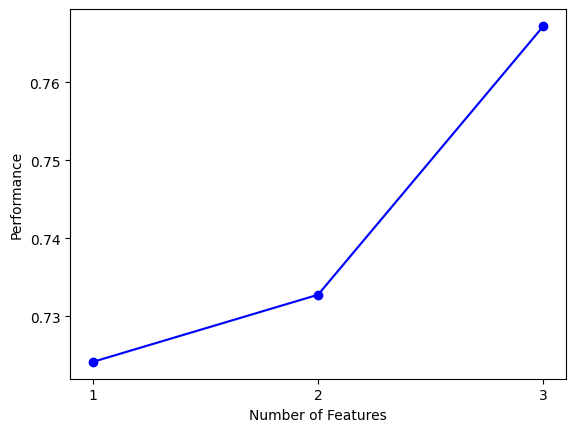

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
plot_sfs(sfs.get_metric_dict())
plt.show()

Here, we see that the 3 features lead to highest performance of the model in this case

# Sequential Backward Selection with mlxtend

It is very similar to sequential forward selection, but there is one key difference. Instead of starting with no features and adding one feature at a time, sequential backward selection starts with all of the available features and removes one feature at a time.

In [ ]:
sbs = SFS(lr,
          k_features=3,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=0)
sbs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=(3, 3), scoring='accuracy')

In [ ]:
# Print the chosen feature names
print(sbs.subsets_[3]['feature_names'])

('Age', 'Glucose', 'Resistin')


According to backward selection, features such as age, glucose and resistIn can improve the model accuracy

In [ ]:
# Print the accuracy of the model after sequential backward selection
print(sbs.subsets_[3]['avg_score'])

0.7413793103448276


However, the accuracy rate is lower than that of forward selection

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


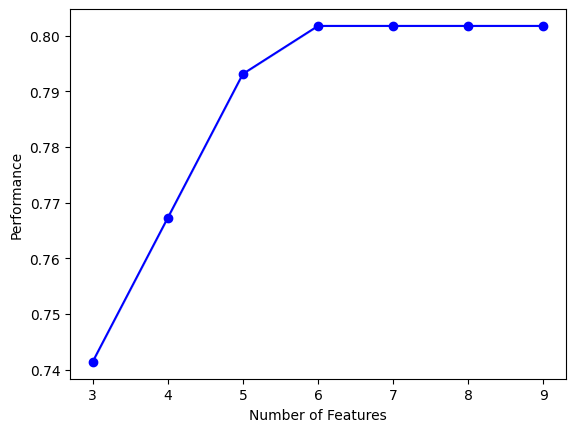

In [ ]:
# Plot the model accuracy
plot_sfs(sbs.get_metric_dict())
plt.show()

The plot shows that the model can perform at higher accuracy rate with 6 or more features

# Sequential Forward and Backward Floating Selection

In [ ]:
# Sequential forward floating selection
sffs = SFS(lr,
          k_features=3,
          forward= True,
          floating= True,
          scoring='accuracy',
          cv=0)
sffs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          floating=True, k_features=(3, 3), scoring='accuracy')

In [ ]:
# Print a tuple with the names of the features chosen by sequential forward floating selection.
print(sffs.subsets_[3]['feature_names'])

('Age', 'Glucose', 'Insulin')


In [ ]:
print(sffs.subsets_[3]['avg_score'])

0.7672413793103449


In [ ]:
# Sequential backward floating selection
sbfs = SFS(lr,
          k_features=3,
          forward=False,
          floating=True,
          scoring='accuracy',
          cv=0)
sbfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          floating=True, forward=False, k_features=(3, 3),
                          scoring='accuracy')

In [42]:
# Print a tuple with the names of the features chosen by sequential backward floating selection.
print(sbfs.subsets_[3]['feature_names'])
print(sbfs.subsets_[3]['avg_score'])

('Age', 'Glucose', 'Resistin')
0.7413793103448276


# Recursive Feature Elimination

Recursive feature elimination is another wrapper method for feature selection. It starts by training a model with all available features. It then ranks each feature according to an importance metric and removes the least important feature. The algorithm then trains the model on the smaller feature set, ranks those features, and removes the least important one. The process stops when the desired number of features is reached.

Recursive feature elimination is different from sequential backward selection. Sequential backward selection removes features by training a model on a collection of subsets (one for each possible feature removal) and greedily proceeding with whatever subset performs best. Recursive feature elimination, on the other hand, only trains a model on one feature subset before deciding which feature to remove next.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

We can use scikit-learn to implement recursive feature elimination. Since we’re using a logistic regression model, it’s important to standardize data before we proceed.

In [ ]:
X_r = np.array(df.iloc[:,:-1])
y_r = np.array(df.iloc[:,-1])

In [ ]:
# Standardize the data
X_r = StandardScaler().fit_transform(X_r)

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

In [ ]:
# Recursive feature elimination
rfe = RFE(lr, n_features_to_select = 3)
rfe.fit(X_r,y_r)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=3)

In [ ]:
feature_list = list(df.columns)
# List of features chosen by recursive feature elimination
rfe_features = [f for (f, support) in zip(feature_list, rfe.support_) if support]

print(rfe_features)
# Print the accuracy of the model with features chosen by recursive feature elimination
print(rfe.support_)
print(rfe.score(X_r,y_r))

['BMI', 'Glucose', 'Resistin']
[False  True  True False False False False  True False]
0.7327586206896551


Methods Used:

Sequential Forward Selection (SFS): Starts with no features and iteratively adds the one that most improves model accuracy. The code identifies 'Age', 'Glucose', and 'Insulin' as the top 3 features, achieving an accuracy of approximately 76%.

Sequential Backward Selection (SBS): Begins with all features and removes the least important one at a time. It selects 'Age', 'Glucose', and 'Resistin', resulting in a lower accuracy of around 74%.

Sequential Forward Floating Selection (SFFS) and Sequential Backward Floating Selection (SBFS): These are variations of SFS and SBS that allow for reconsidering previously added or removed features. SFFS selects 'Age', 'Glucose', and 'Insulin', yielding an accuracy of about 76%. SBFS chooses 'Age', 'BMI', and 'Glucose' with the accuracy of 74%.

Recursive Feature Elimination (RFE): This method recursively removes features based on their importance until the desired number is reached. After standardizing the data, RFE selects 'BMI', 'Glucose', and 'ResistIn', achieving an accuracy of 73%.

Observations:

SFS and SFFS identified similar feature subsets and achieved the highest accuracy among the wrapper methods explored.
SBS and RFE resulted in slightly lower accuracy compared to SFS and SFFS.

The choice of wrapper method and the resulting feature subset can significantly impact model performance.
Visualization using plot_sfs helps understand the relationship between the number of features and model accuracy.
The plot shows that the model would perform better with 5 or more features.
Also, it is observed that glucose and age can be the strongest predictors, followed by ResistIn, Insulin, and BMI.